<a href="https://colab.research.google.com/github/Teopx/UTFPR/blob/main/EXERCICIO_4_APREND_SUPERV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCÍCIO AULA 4 - ENSEMBLE LEARNING



**Discente:**Cléber Fernando Paixão

**Objetivo:** Desenvolver um pipeline completo de aprendizado supervisionado utilizando ensemble learning para resolver um problema de regressão utilizando o dataset diabetes ou california_housing do scikit-learn.

**Descrição do Problema:** Utilize ao menos três tipos diferentes de ensemble learning

** **texto em negrito**Tarefa:**
 Implemente um pipeline de aprendizado de máquina que:
1. Carregue e prepare o dataset de breast_cancer (não utilize os rótulos).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import (AgglomerativeClustering,DBSCAN,KMeans)
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, silhouette_score
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importando o arquivo :
def load_and_prepare_data():
    """Loads the breast_cancer dataset and returns features."""
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Escalar os dados:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

2. Utilize regra do cotovelo ou silhueta para determinar o número de clusters

In [ ]:
# Aplicando a regra e determinando o nr de clusters:

# Regra do Cotovelo
sse = []
max_k = 10
for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)

# Análise da Silhueta
silhouette_scores = []
# K-Means precisa de 2 clusters para calcular a silhueta
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    labels = kmeans.fit_predict(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, labels))

# a) Plotar o método do cotovelo:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, max_k + 1), sse, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Soma dos quadrados do erro')
plt.title('Regra do Cotovelo no K-Means')
plt.xticks(range(1, max_k + 1))
plt.grid(True)

# b) Plotar os scores da silhueta
plt.subplot(1, 2, 2)
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Análise da Silhueta para K-Means')
plt.xticks(range(2, max_k + 1))
plt.grid(True)
plt.tight_layout()
plt.savefig('elbow_silhouette_plots.png')
plt.close()


Número ideal de clusters de acordo com a pontuação da silhueta: 2
K-Means Silhouette Score: 0.3447
Pontuação de Silhueta de Agrupamento Aglomerativo: 0.3394
DBSCAN Pontuação da silhueta: Not applicable (due to noise or single cluster)


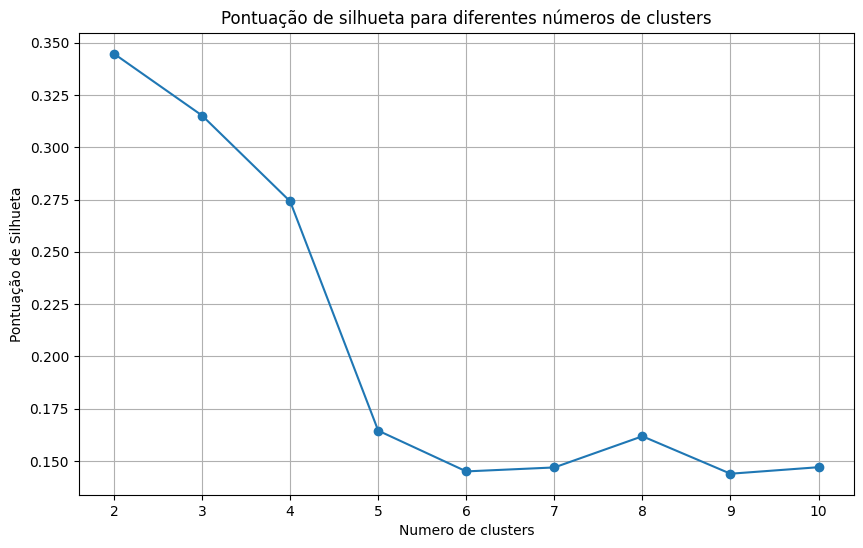

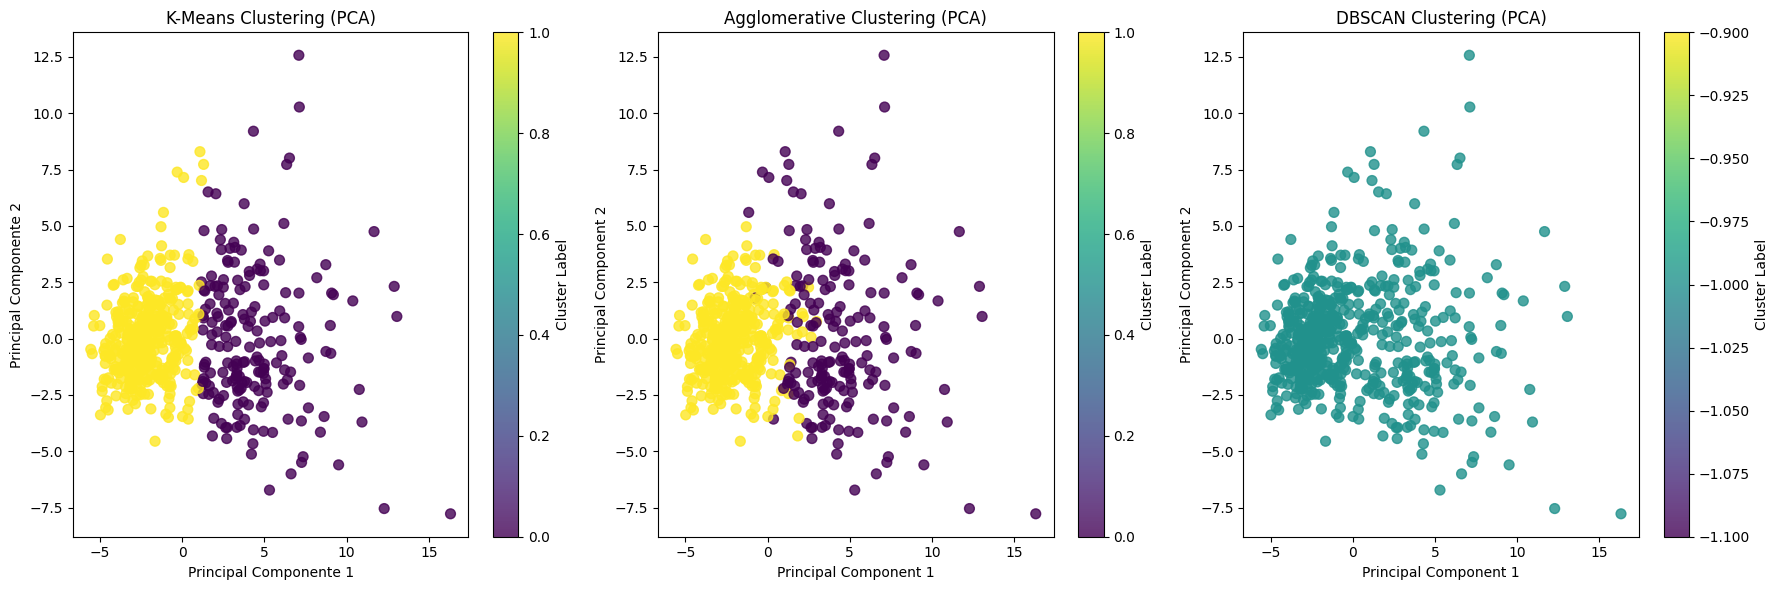

In [ ]:
# Determine o número ideal de clusters
optimal_k = determine_optimal_clusters(X_scaled)

# Aplique os algoritmos de agrupamento
clustering_results = apply_clustering(X_scaled, optimal_k)

# Visualize os resultados
visualize_clusters_pca(X_scaled, clustering_results, y)

3. Utilize ao menos três algoritmos de agrupamento diferentes.
4. Para cada modelo:
○ Realize o processo de agrupamento.
○ Faça a avaliação de desempenho usando a métrica da silhueta.
5.  Apresente figuras com os resultados utilizando PCA para criar as figuras
bidimensionais.


In [ ]:
# Redução de dimensionalidade com PCA para visualização
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Armazenando resultados para cada modelo
results = {}

# 3. Aplicando os algoritmos de agrupamento:

# a) K-Means
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init='auto')
kmeans_labels = kmeans_model.fit_predict(X_scaled)
kmeans_silhouette = silhouette_score(X_scaled, kmeans_labels)
results['K-Means'] = {'labels': kmeans_labels, 'silhouette': kmeans_silhouette}

# b) DBSCAN
dbscan_model = DBSCAN(eps=0.9, min_samples=5)
dbscan_labels = dbscan_model.fit_predict(X_scaled)

if len(np.unique(dbscan_labels)) > 1 and -1 not in dbscan_labels:
    dbscan_silhouette = silhouette_score(X_scaled, dbscan_labels)
elif len(np.unique(dbscan_labels)) == 2 and -1 in dbscan_labels:
    unique_labels_dbscan = np.unique(dbscan_labels)
    if len(unique_labels_dbscan) > 1:
        non_noise_indices = dbscan_labels != -1
        if len(np.unique(dbscan_labels[non_noise_indices])) > 1:
            dbscan_silhouette = silhouette_score(X_scaled[non_noise_indices], dbscan_labels[non_noise_indices])
        else:
            dbscan_silhouette = -1.0
        dbscan_silhouette = -1.0
else:
    dbscan_silhouette = -1.0

results['DBSCAN'] = {'labels': dbscan_labels, 'silhouette': dbscan_silhouette}


# Agrupamento Hierárquico  também chamado de: Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=optimal_k)
agg_labels = agg_model.fit_predict(X_scaled)
agg_silhouette = silhouette_score(X_scaled, agg_labels)
results['Agglomerative Clustering'] = {'labels': agg_labels, 'silhouette': agg_silhouette}

#Figuras utilizando PCA
plt.figure(figsize=(18, 6))

for i, (model_name, model_results) in enumerate(results.items()):
    plt.subplot(1, len(results), i + 1)
    if model_name == 'DBSCAN' and -1 in model_results['labels']:
        noise_mask = model_results['labels'] == -1
        plt.scatter(X_pca[~noise_mask, 0], X_pca[~noise_mask, 1], c=model_results['labels'][~noise_mask], cmap='viridis', s=50, alpha=0.7)
        plt.scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1], c='black', marker='x', s=50, label='Ruído')
        plt.title(f'{model_name} (Silhueta: {model_results["silhouette"]:.2f})')
        plt.legend()
    else:
        plt.scatter(X_pca[:, 0], X_pca[:, 1], c=model_results['labels'], cmap='viridis', s=50, alpha=0.7)
        plt.title(f'{model_name} (Silhueta: {model_results["silhouette"]:.2f})')
    plt.xlabel('Componente Principal 1')
    plt.ylabel('Componente Principal 2')
    plt.grid(True)
plt.tight_layout()
plt.savefig('clustering_pca_plots.png')
plt.close()


6.  Com base nos rótulos do dataset, calcule a acurácia de cada uma das técnicas de aprendizagem.

In [ ]:
# Acurácia de cada uma das técnicas:

def calculate_clustering_accuracy(true_labels, cluster_labels):
    # ignorando -1 de DBSCAN se presente
    unique_cluster_labels = np.unique(cluster_labels[cluster_labels != -1])
    # Identifica os rótulos únicos nas classes verdadeiras
    unique_true_labels = np.unique(true_labels)

    if len(unique_cluster_labels) != len(unique_true_labels):
        print(f"Aviso: Número de clusters ({len(unique_cluster_labels)}) difere do número de classes reais ({len(unique_true_labels)}).")
        if len(unique_cluster_labels) == 0: return 0.0
        if len(unique_cluster_labels) == 1:
            from collections import Counter
            most_common_class = Counter(true_labels).most_common(1)[0][1]
            return most_common_class / len(true_labels)

    # Para 2 clusters, teste as duas permutações
    if len(unique_cluster_labels) == 2 and len(unique_true_labels) == 2:
        # Permutação 1: cluster 0 -> true 0, cluster 1 -> true 1
        mapped_labels_p1 = np.where(cluster_labels == unique_cluster_labels[0], unique_true_labels[0], unique_true_labels[1])
        acc_p1 = accuracy_score(true_labels, mapped_labels_p1)

        # Permutação 2: cluster 0 -> true 1, cluster 1 -> true 0
        mapped_labels_p2 = np.where(cluster_labels == unique_cluster_labels[0], unique_true_labels[1], unique_true_labels[0])
        acc_p2 = accuracy_score(true_labels, mapped_labels_p2)

        return max(acc_p1, acc_p2)
    elif len(unique_cluster_labels) == len(unique_true_labels):
        from scipy.optimize import linear_sum_assignment
        from sklearn.metrics import confusion_matrix

        # A matriz de custo
        cm = confusion_matrix(true_labels, cluster_labels[cluster_labels != -1])
        # A matriz de custo para atribuição é baseada nos erros (total de pontos - acertos)
        cost_matrix = -cm.T

        # Buscar a atribuição ótima
        row_ind, col_ind = linear_sum_assignment(cost_matrix)

        # Calculo da acurácia
        correct_matches = cm[col_ind, row_ind].sum()
        accuracy = correct_matches / len(true_labels)
        return accuracy
    else:
        print("Mapeamento não atinge a acurácia completa!!!.")
        return 0.0


accuracy_scores = {}
for model_name, model_results in results.items():

    if model_name == 'DBSCAN':
        non_noise_indices = model_results['labels'] != -1

        if len(np.unique(model_results['labels'][non_noise_indices])) < 2 and len(np.unique(y)) == 2:
            print(f"Para DBSCAN, menos de 2 clusters válidos foram encontrados (além do ruído). A acurácia pode ser misleading.")
            accuracy_scores[model_name] = 0.0
        elif len(non_noise_indices) == 0:
             accuracy_scores[model_name] = 0.0
        else:
            accuracy_scores[model_name] = calculate_clustering_accuracy(y[non_noise_indices], model_results['labels'][non_noise_indices])
    else:
        accuracy_scores[model_name] = calculate_clustering_accuracy(y, model_results['labels'])

print("\nResultados de Desempenho (Coeficiente de Silhueta):")
for model_name, model_results in results.items():
    print(f"{model_name}: {model_results['silhouette']:.4f}")

print("\nResultados de Acurácia (comparado aos rótulos reais):")
for model_name, acc in accuracy_scores.items():
    print(f"{model_name}: {acc:.4f}")



Para DBSCAN, menos de 2 clusters válidos foram encontrados (além do ruído). A acurácia pode ser misleading.

Resultados de Desempenho (Coeficiente de Silhueta):
K-Means: 0.3447
DBSCAN: -1.0000
Agglomerative Clustering: 0.3394

Resultados de Acurácia (comparado aos rótulos reais):
K-Means: 0.9121
DBSCAN: 0.0000
Agglomerative Clustering: 0.8805
